In [ ]:
!sudo apt -y install libportaudio2
!pip install -q tflite-model-maker

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!gdown '1sL6ur15_tK3QPalQgKFy5netCQxSWiGJ'
!unzip datasets.zip

In [ ]:
data = DataLoader.from_folder('/content/datasets')
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

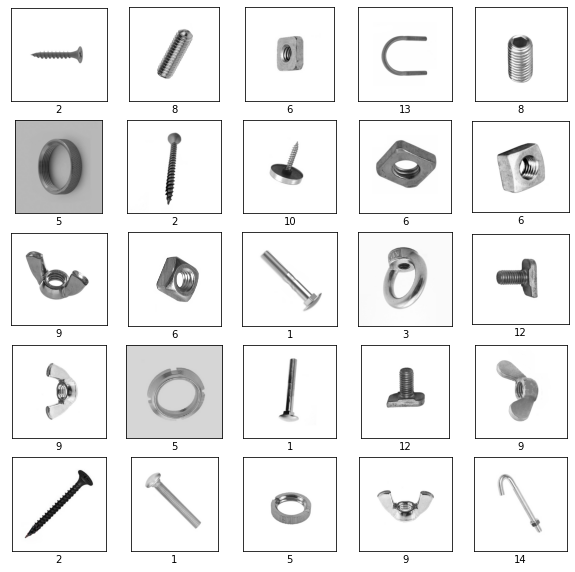

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
epochs = 20;
model = image_classifier.create(train_data, validation_data=validation_data, epochs=epochs, dropout_rate=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 3,432,239
Trainable params: 19,215
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/20
43/43 [==============================] - 80s 2s/step - loss: 1.6580 - accuracy: 0.6148 - val_loss: 1.0054 - val_accuracy: 0.8671
Epoch 2/20
43/43 [==============================] - 77s 2s/step - loss: 0.8863 - accuracy: 0.9

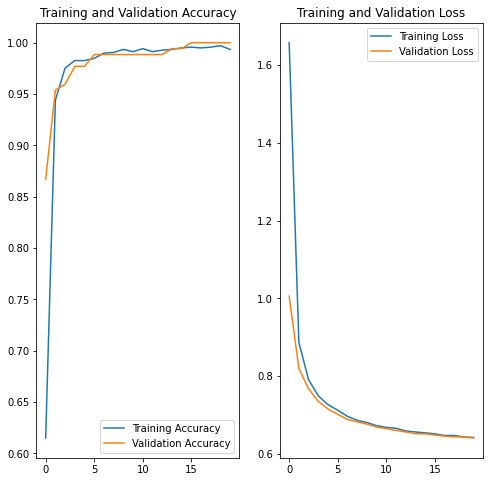

In [ ]:
history = model.history;

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_data)

6/6 [==============================] - 27s 1s/step - loss: 0.6502 - accuracy: 0.9943


In [ ]:
config = QuantizationConfig.for_float16()

In [ ]:
model.export(export_dir='/content', tflite_filename='model.tflite', quantization_config=config)